DEPRESSION CLASSIFICATION MODEL:
NAÏVE BAYES 
It is a classification technique based on Bayes’ Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other featur.


In [167]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
#loading the dataset
df = pd.read_csv('final.csv')

In [169]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Physical Activity', 'Mood Score',
       'phq_score [PHQ-9]', 'gad_score [GAD-7]'],
      dtype='object')

In [170]:
df.head(10)

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]
0,62,Male,Bachelor,Unemployed,No,0.170650,7,3,2,7.651882,11,10
1,18,Female,Ph.D.,Unemployed,Yes,0.620737,4,1,1,2.025711,23,14
2,21,Female,Ph.D.,Unemployed,Yes,0.412697,7,9,1,1.300640,0,14
3,21,Male,Master,Employed,No,0.409237,4,4,2,5.607167,27,15
4,57,Female,High School,Unemployed,No,0.145520,6,6,0,1.300060,16,10
5,27,Male,Ph.D.,Student,Yes,0.001865,4,3,1,7.563604,15,9
6,37,Male,Master,Employed,No,0.972120,4,8,0,5.697635,9,4
7,39,Female,High School,Student,No,0.251944,4,2,1,5.229995,4,18
8,54,Male,Master,Employed,No,0.710113,6,9,1,3.932636,13,13
9,41,Male,Bachelor,Unemployed,Yes,0.214553,6,1,4,6.695255,14,0


In [171]:
df.shape

(5001, 12)

In [172]:
#data preprocessing
df[df.isnull().any(axis=1)].head()

,Age,Gender,Education Level,Employment Status,Family History of Depression,Stress Level,Sleep Hours,Number of Social Interactions,Physical Activity,Mood Score,phq_score [PHQ-9],gad_score [GAD-7]


In [173]:
#creating copy of dataset
clean_data=df.copy()

In [174]:
clean_data['severe_depression_label'] = ((clean_data['phq_score [PHQ-9]']>=10) & (clean_data['gad_score [GAD-7]']>=7))*1

In [175]:
clean_data[ 'severe_depression_label'].head()

0    1
1    1
2    0
3    1
4    1
Name: severe_depression_label, dtype: int32

In [176]:
#creating target variable for data modelling
y=clean_data[['severe_depression_label']].copy()
y.head()

,severe_depression_label
0,1
1,1
2,0
3,1
4,1


In [177]:
features=['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score','phq_score [PHQ-9]', 'gad_score [GAD-7]']

In [178]:
X=clean_data[features]
X.head()
X.columns

Index(['Age', 'Gender', 'Education Level', 'Employment Status',
       'Family History of Depression', 'Stress Level', 'Sleep Hours',
       'Number of Social Interactions', 'Mood Score', 'phq_score [PHQ-9]',
       'gad_score [GAD-7]'],
      dtype='object')

In [179]:
# Perform one-hot encoding for categorical columns
categorical_columns = ['Gender', 'Education Level', 'Employment Status', 'Family History of Depression']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [181]:
#importing GaussianNB 
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()   #nb is instance created of the GNB classifier
nb.fit(X_train,y_train) #training the data
y_pred=nb.predict(X_test)

In [182]:
nb.score(X_test,y_test)

0.9393737508327782

In [183]:
# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred,zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy : {accuracy*100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       871
           1       0.99      0.87      0.92       630

    accuracy                           0.94      1501
   macro avg       0.95      0.93      0.94      1501
weighted avg       0.94      0.94      0.94      1501


Confusion Matrix:
[[864   7]
 [ 84 546]]

Accuracy : 93.94%


In [184]:
predictions=nb.predict(X_test)

In [185]:
list(zip(predictions,y_test))

[(1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 

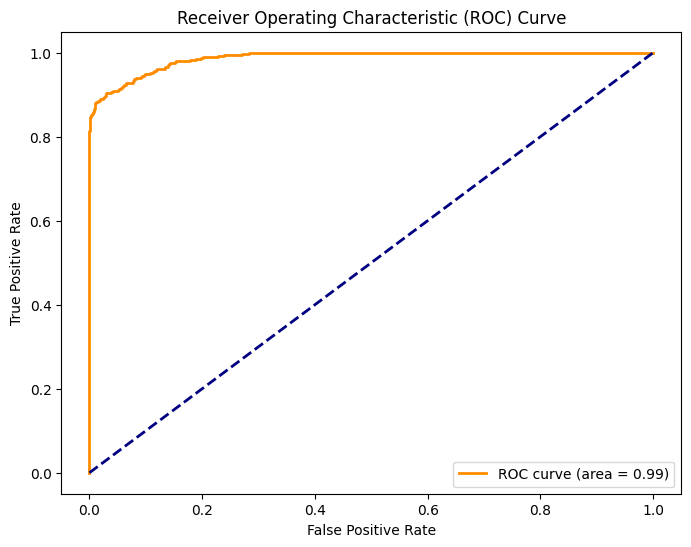

In [186]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = nb.predict_proba(X_test)

positive_class_probs = y_pred_prob[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probs)

# AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

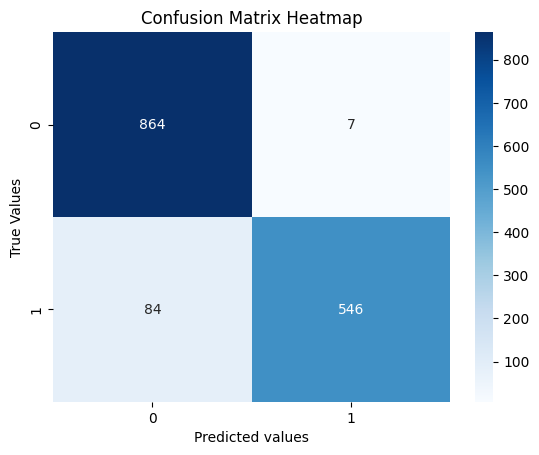

In [187]:
cm = confusion_matrix(y_test,y_pred)

# Heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted values")
plt.ylabel("True Values")
plt.show()